**Indicaciones de importancia.**

Para el correcto funcionamiento del presente colab, es necesario crear una carpeta llamada "prueba" en Google Drive, de lo contrario no logrará avanzar mas allá de la celda de "Conexión a drive".

# Librerías

In [126]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Conexión a drive

In [3]:
#Se monta drive
%cd ..
drive.mount('/content/gdrive')

#esto crea un enlace para que ahora la ruta /content/gdrive/My\ Drive/ sea igual a /mydrive para acortar
!ln -s /content/gdrive/My\ Drive/ /mydrive

#se accede a /mydrive/prueba enlace donde se contienen los archivos .csv
%cd /mydrive/prueba

/
Mounted at /content/gdrive
/content/gdrive/My Drive/prueba


In [4]:
#se corrobora la existencia de los archivos .csv en la carpeta
%ls

'Features data set.csv'                              'sales data-set.gsheet'
'Features data set.gsheet'                            Tabla_1.csv
'Prueba técnica Adtwins, Científico de datos.ipynb'   Tabla_1.gsheet
'sales data-set.csv'


# Procesamiento de los datos iniciales

In [5]:
#se cargan los datos de los archivos .csv, haciendo uso de la librería pandas se almacenan en dataframes con sus correspondientes nombres
Tabla_1 = pd.read_csv('Tabla_1.csv', header = 0)
Features_data_set = pd.read_csv('Features data set.csv', header = 0)
sales_data_set = pd.read_csv('sales data-set.csv', header = 0)

In [6]:
#Se unen todos los datos, aquellos que se usarán como predictores y variable respuesta en un único dataframe
join_data = pd.merge(Features_data_set, sales_data_set, on = ['Store', 'Date'])
join_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


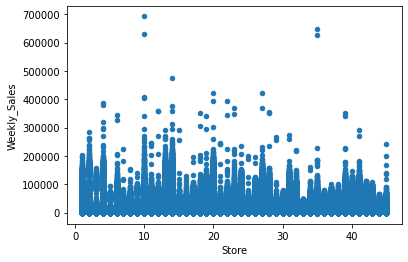

In [7]:
join_data.plot(kind = 'scatter', x = 'Store', y =  'Weekly_Sales')
plt.show()

In [8]:
#Se eliminan aquellas filas con datos nulos
join_data.dropna(inplace=True)
join_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
6587,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False
6588,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False
6589,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False
6590,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False
6591,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [9]:
#a continuación se separan los datos de los días festivos para analizarlos por separado.
join_data_Holiday = join_data.query('IsHoliday_x == True')
join_data_no_Holiday = join_data.query('IsHoliday_x == False')

# KNN

## Primer set
Haciendo uso de los datos disponibilisados se trabajará analizando la totalidad de los datos pero separando los dias festivos y no festivos.

### Datos no festivos:

In [10]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y = join_data_no_Holiday["Weekly_Sales"].values
X = join_data_no_Holiday[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [ ]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [119]:
#crea un modelo KNN con 5 "vecinos"
knn = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [120]:
#realiza una predicción en base a los datos de testeo
y_pred = knn.predict(X_test)
#se imprime las predicciones realizadas
print("Predicciones: {}".format(y_pred))

Predicciones: [11163.406  7998.95   8374.202 ... 19166.96   2517.324 56267.766]


In [121]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_knn = knn.score(X_test, y_test)
score_knn

0.2322442584524661

In [14]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds = knn.predict(X_test)

performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': (abs(preds - y_test)*100)/y_test})

performance

<ipython-input-14-143d3f6f55f2>:6: RuntimeWarning: divide by zero encountered in true_divide
  'Error': (abs(preds - y_test)*100)/y_test})


,True Value,Prediction,Error
0,15384.52,11163.406,27.437411
1,3465.99,7998.950,130.783990
2,40360.06,9790.716,75.741572
3,8406.65,3996.652,52.458447
4,3301.76,6874.496,108.207017
...,...,...,...
17408,7373.20,18591.356,152.147724
17409,1804.04,22423.224,1142.944946
17410,4546.38,19166.960,321.587285
17411,7600.50,2517.324,66.879495


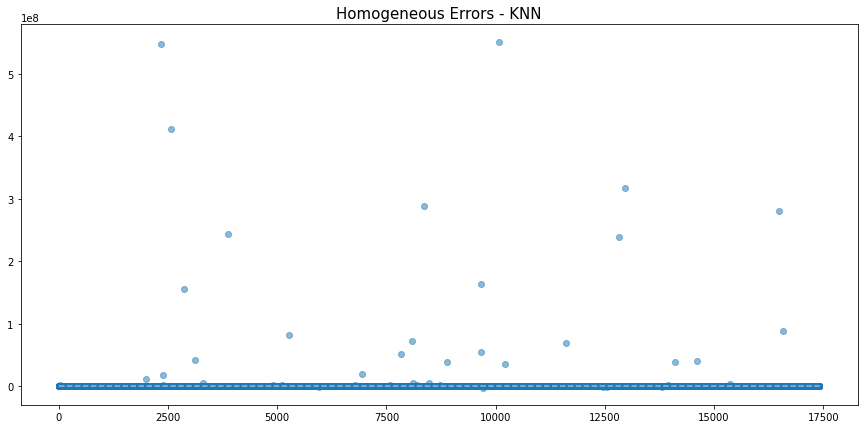

In [15]:
plt.figure(figsize=(15,7))
# Errores
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=17413, linestyle='--', color='white', alpha=.5);

In [16]:
#a continuación se verifica la precisión de forma "manual" en base a un treshold menor al 30% de error
performance["acceptance_criteria"] = 0
performance.loc[performance.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance)

,True Value,Prediction,Error,acceptance_criteria
0,15384.52,11163.406,27.437411,1
1,3465.99,7998.950,130.783990,0
2,40360.06,9790.716,75.741572,0
3,8406.65,3996.652,52.458447,0
4,3301.76,6874.496,108.207017,0
...,...,...,...,...
17408,7373.20,18591.356,152.147724,0
17409,1804.04,22423.224,1142.944946,0
17410,4546.38,19166.960,321.587285,0
17411,7600.50,2517.324,66.879495,0


In [17]:
len(performance.query('Error<=30').index)

3827

In [18]:
(len(performance.index))

17413

In [19]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance.query('Error<=30').index)/(len(performance.index))

0.2197783265376443

Actualmente el valor obtenido es cercano al obtenido por la función .score

1.   **Score**: 0.2258022669777655
2.   **Precisión manual**: 0.2255211623499684

A continuación se analizan los datos para decidir los cambios pertinentes para los siguientes set de entrenamiento.

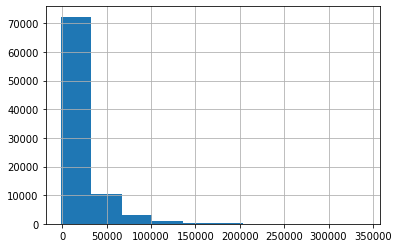

In [20]:
join_data_no_Holiday['Weekly_Sales'].hist()

Ante el gráfico anterior, se obserba una necesidad de balanceo en los datos.

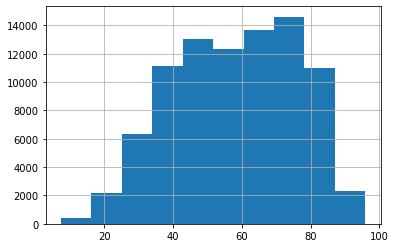

In [21]:
join_data_no_Holiday['Temperature'].hist()

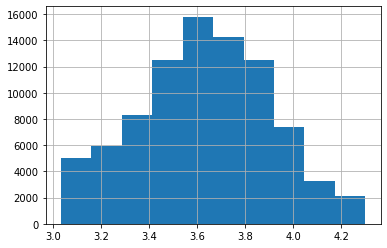

In [22]:
join_data_no_Holiday['Fuel_Price'].hist()

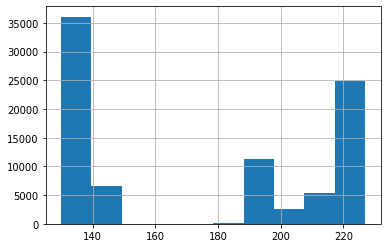

In [23]:
join_data_no_Holiday['CPI'].hist()

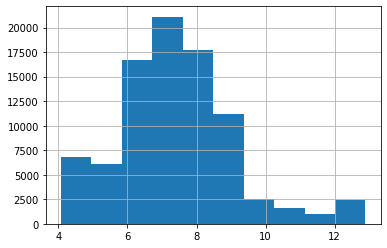

In [24]:
join_data_no_Holiday['Unemployment'].hist()

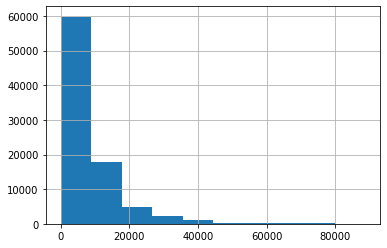

In [25]:
join_data_no_Holiday['MarkDown1'].hist()

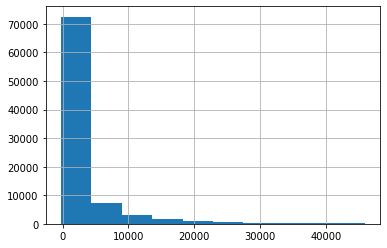

In [26]:
join_data_no_Holiday['MarkDown2'].hist()

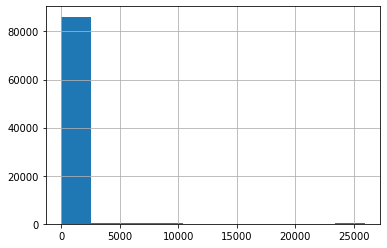

In [27]:
join_data_no_Holiday['MarkDown3'].hist()

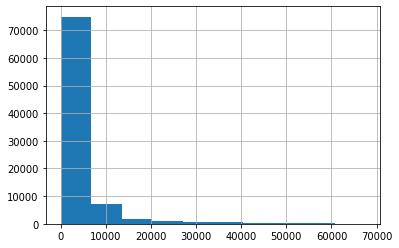

In [28]:
join_data_no_Holiday['MarkDown4'].hist()

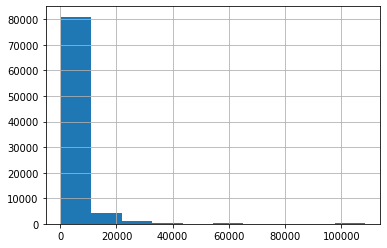

In [29]:
join_data_no_Holiday['MarkDown5'].hist()

en base a los gráficos de los datos Markdown's, se observa que para reducir la carga al modelo, estos se puede unir en una columna sin afectar negaticamente el modelo.

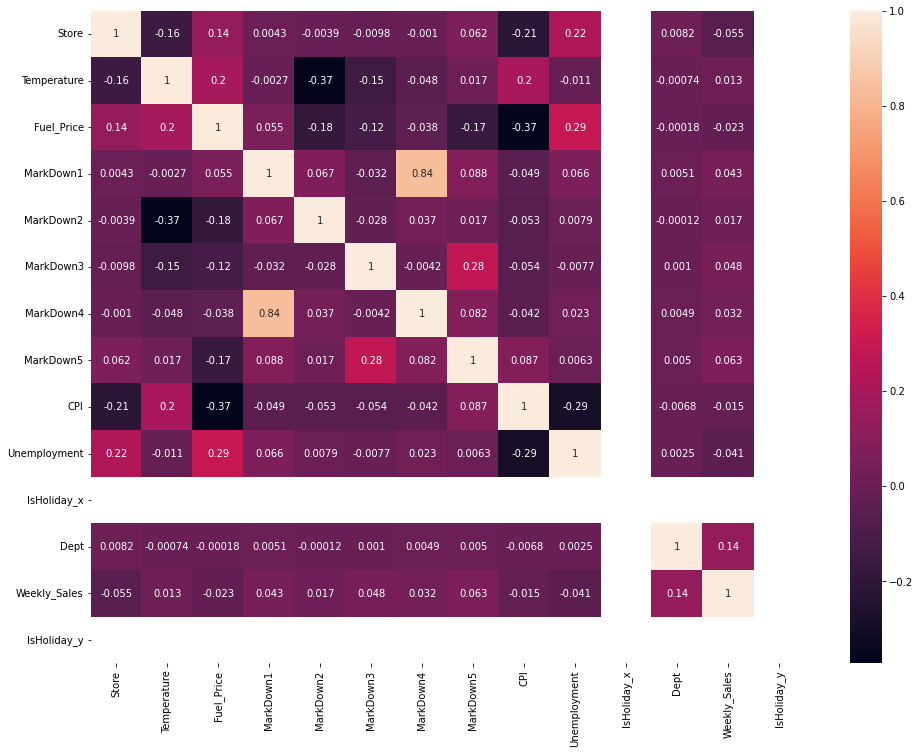

In [30]:
corr_datos = join_data_no_Holiday.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_datos, annot=True)
plt.show()

Además, a traves del gráfico de correlación, se puede observar que los datos de "Markdown1" y "Markdown4", se comportan de manera similar, es por ello, que se puede eliminar una de las dos columnas de datos sin mayor conflicto.

### Datos festivos:

In [31]:
#se crean arrays para las características y la variable de destino en el caso de dias festivos.
y_H = join_data_Holiday["Weekly_Sales"].values
X_H = join_data_Holiday[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [32]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X_H, y_H, test_size= 0.2)

#crea un modelo KNN con 5 "vecinos"
knn_H = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn_H.fit(X_train_H, y_train_H)


KNeighborsRegressor()

In [33]:
#realiza una predicción en base a los datos de testeo
y_pred_H = knn_H.predict(X_test_H)
#se imprime las predicciones realizadas
print("Predicciones festivas: {}".format(y_pred_H))

Predicciones festivas: [ 4358.884 48825.686 43172.508 ...  1266.744 28964.312  6925.688]


In [34]:
#se verifica la precisión con los datos de testeo
score_knn_H = knn_H.score(X_test_H, y_test_H)
score_knn_H

0.15675293315282735

In [35]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds_H = knn_H.predict(X_test_H)

performance_H = pd.DataFrame({ 'True Value': y_test_H,
                            'Prediction': preds_H,
                            'Error': (abs(preds_H - y_test_H)*100)/y_test_H})

performance_H

,True Value,Prediction,Error
0,44.55,4358.884,9684.251403
1,1550.00,48825.686,3050.044258
2,1895.72,43172.508,2177.367333
3,15733.64,13562.528,13.799172
4,11580.03,10589.336,8.555194
...,...,...,...
1994,8430.76,10341.120,22.659404
1995,7096.43,6534.200,7.922716
1996,15055.48,1266.744,91.586160
1997,20043.80,28964.312,44.505094


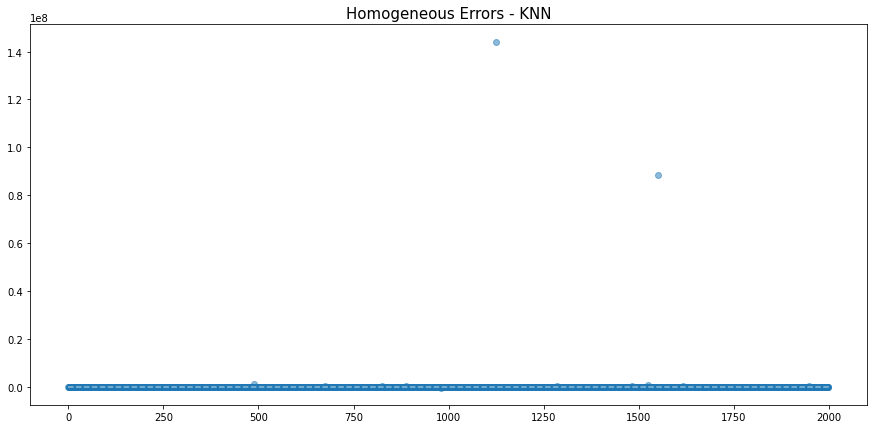

In [36]:
plt.figure(figsize=(15,7))
# Errores
ax_x_H= performance_H['True Value']
ax_y_H= performance_H['Prediction']
yerr_H= performance_H['Error']

plt.scatter(range(len(yerr_H)), yerr_H, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=2000, linestyle='--', color='white', alpha=.5);

In [37]:
#a continuación se verifica la precisión de forma "manual" en base a un treshold menor al 30% de error
performance_H["acceptance_criteria"] = 0
performance_H.loc[performance_H.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance_H)

,True Value,Prediction,Error,acceptance_criteria
0,44.55,4358.884,9684.251403,0
1,1550.00,48825.686,3050.044258,0
2,1895.72,43172.508,2177.367333,0
3,15733.64,13562.528,13.799172,1
4,11580.03,10589.336,8.555194,1
...,...,...,...,...
1994,8430.76,10341.120,22.659404,1
1995,7096.43,6534.200,7.922716,1
1996,15055.48,1266.744,91.586160,0
1997,20043.80,28964.312,44.505094,0


In [38]:
len(performance_H.query('Error<=30').index)

400

In [39]:
(len(performance_H.index))

1999

In [40]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance_H.query('Error<=30').index)/(len(performance_H.index))

0.2001000500250125

Actualmente el valor obtenido es cercano al obtenido por la función .score

1.   **Score**: 0.1322228498354584
2.   **Precisión manual**: 0.2111055527763882

## Segundo set
Donde se realiza un balanceo de datos para la columna "Weekly_Sales"

### Datos no festivos:

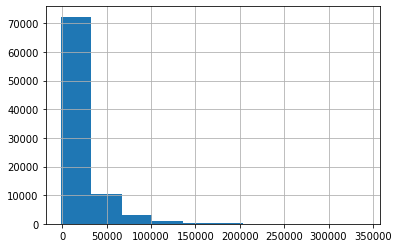

In [41]:
join_data_no_Holiday['Weekly_Sales'].hist()

In [42]:
#se agrupa el conjunto de datos en los que las ventas semanales sean como máximo 30000
Data_Weekly_Sales_Cheap = join_data_no_Holiday.query('Weekly_Sales <= 30000')
len(Data_Weekly_Sales_Cheap)

70856

In [43]:
len(join_data_no_Holiday.query('Weekly_Sales > 30000'))

16208

In [44]:
#se escojen 20000 datos al azar del conjunto de datos anteriormente creado y se concatenan con aquellos datos de las ventas semanales cuyo valor sea mayor a 30000
join_data_no_Holiday2 = pd.concat([Data_Weekly_Sales_Cheap.sample(n=20000), join_data_no_Holiday.query('Weekly_Sales > 30000')])

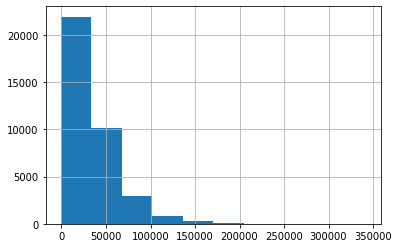

In [45]:
#Se obserba la mejora en el balanceo de los datos de las ventas semanales, es decir, "Weekly_Sales".
join_data_no_Holiday2['Weekly_Sales'].hist()

A continuación se procede a realizar en entrenamiento de manera homóloga al set 1

In [46]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y2 = join_data_no_Holiday2["Weekly_Sales"].values
X2 = join_data_no_Holiday2[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [47]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.2)

In [48]:
#crea un modelo KNN con 5 "vecinos"
knn2 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el nuevo regresor
knn2.fit(X_train2, y_train2)

KNeighborsRegressor()

In [49]:
#realiza una predicción en base a los datos de testeo
y_pred2 = knn2.predict(X_test2)
#se imprime las predicciones realizadas
print("Predicciones set 2: {}".format(y_pred2))

Predicciones set 2: [39932.886 18979.652 26099.    ... 26815.39  20908.488 17240.944]


In [50]:
#se verifica la precisión con los datos de testeo
score_knn2 = knn2.score(X_test2, y_test2)
score_knn2

0.16354566929705527

In [51]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds2 = knn2.predict(X_test2)

performance2 = pd.DataFrame({ 'True Value': y_test2,
                            'Prediction': preds2,
                            'Error': (abs(preds2 - y_test2)*100)/y_test2})

performance2

,True Value,Prediction,Error
0,6285.86,39932.886,535.281187
1,203.57,18979.652,9223.403252
2,2438.00,26099.000,970.508614
3,50389.45,30255.466,39.956745
4,2115.54,25292.714,1095.567751
...,...,...,...
7237,33504.62,49026.428,46.327366
7238,59268.21,22030.970,62.828353
7239,306.55,26815.390,8647.476757
7240,1345.61,20908.488,1453.829713


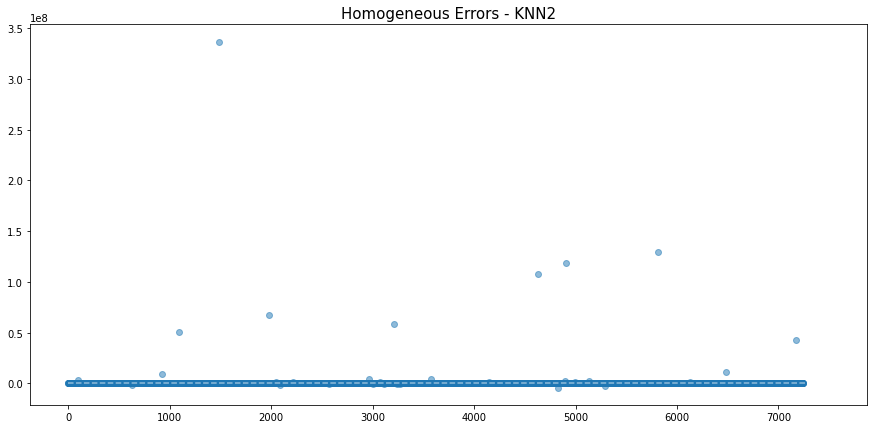

In [52]:
plt.figure(figsize=(15,7))
# Errores
ax_x2= performance2['True Value']
ax_y2= performance2['Prediction']
yerr2= performance2['Error']

plt.scatter(range(len(yerr2)), yerr2, alpha=.5)
plt.title('Homogeneous Errors - KNN2', size=15);
plt.hlines(y=0, xmin=0, xmax=7500, linestyle='--', color='white', alpha=.5);

In [53]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance2["acceptance_criteria"] = 0
performance2.loc[performance2.query('Error<=15').index ,"acceptance_criteria"]=1
display(performance2)

,True Value,Prediction,Error,acceptance_criteria
0,6285.86,39932.886,535.281187,0
1,203.57,18979.652,9223.403252,0
2,2438.00,26099.000,970.508614,0
3,50389.45,30255.466,39.956745,0
4,2115.54,25292.714,1095.567751,0
...,...,...,...,...
7237,33504.62,49026.428,46.327366,0
7238,59268.21,22030.970,62.828353,0
7239,306.55,26815.390,8647.476757,0
7240,1345.61,20908.488,1453.829713,0


In [54]:
len(performance.query('Error<=30').index)

3827

In [55]:
(len(performance.index))

17413

In [56]:
len(performance2.query('Error<=30').index)

1504

In [57]:
(len(performance2.index))

7242

In [58]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance2.query('Error<=30').index)/(len(performance2.index))

0.20767743717205192

Actualmente el valor obtenido no es cercano al obtenido por la función .score para el set 2.

1.   **Score**: 0.16334375551144098
2.   **Precisión manual**: 0.20892018779342722

### Datos festivos:

Para realizar el proceso de igual manera en todo el set 2, se analiza si es necesario realizar nuevamente un balanceo de datos para la columna "Weekly_Sales"

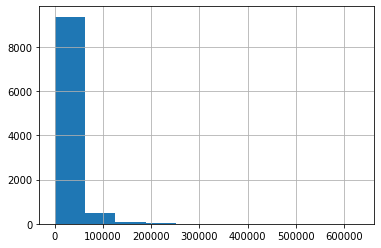

In [59]:
join_data_Holiday['Weekly_Sales'].hist()

Tras analizar el gráfico, se decide balancear los datos de este.

In [60]:
len(join_data_Holiday)

9992

In [61]:
#se agrupa el conjunto de datos en los que las ventas semanales sean como máximo 30000
Data_Weekly_Sales_Cheap_Holyday = join_data_Holiday.query('Weekly_Sales <= 40000')
len(Data_Weekly_Sales_Cheap_Holyday)

8664

**analizar qué cantidad de datos es necesaria para realizar el balance, luego seguir los mismos pasos para todo.**

In [62]:
#se escojen 20000 datos al azar del conjunto de datos anteriormente creado y se concatenan con aquellos datos de las ventas semanales cuyo valor sea mayor a 30000
join_data_Holiday2 = pd.concat([Data_Weekly_Sales_Cheap_Holyday.sample(n=1500), join_data_Holiday.query('Weekly_Sales > 30000')])

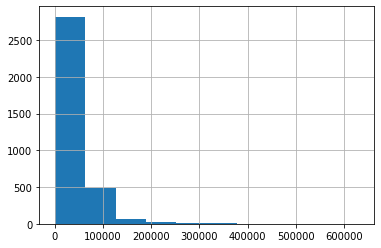

In [63]:
#Se obserba la mejora en el balanceo de los datos de las ventas semanales, es decir, "Weekly_Sales".
join_data_Holiday2['Weekly_Sales'].hist()

Al observar el gráfico se observa que no es una gran mejora en el balanceo de los datos, pero intentar balancear con un conjunto más acotado de datos, sería perjudicial para el modelo.

In [64]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_H2 = join_data_Holiday2["Weekly_Sales"].values
X_H2 = join_data_Holiday2[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [65]:
X_train_H2, X_test_H2, y_train_H2, y_test_H2 = train_test_split(X_H2, y_H2, test_size= 0.2)

In [66]:
#crea un modelo KNN con 5 "vecinos"
knn_H2 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el nuevo regresor
knn_H2.fit(X_train_H2, y_train_H2)

KNeighborsRegressor()

In [67]:
#realiza una predicción en base a los datos de testeo
y_pred_H2 = knn_H2.predict(X_test_H2)
#se imprime las predicciones realizadas
print("Predicciones festivas del set 2: {}".format(y_pred_H2))

Predicciones festivas del set 2: [ 30383.03   21267.238  25843.19   27129.132  24040.372  34788.932
  57600.202  90750.442  29579.056  18228.314  18171.526  30964.57
  55057.134  36840.722  47163.304  22596.226  38316.164  81993.804
  19832.156  73479.412  42974.634  29712.37   61837.832  47262.306
   5957.838  70929.772  28222.226  36171.83   51507.962  17400.97
   4939.812 106710.242  47322.992  29107.22   20157.918  27834.58
  32274.58   28680.3    66610.414 108719.926  11579.448  62278.858
  17590.062  40618.104  24960.484  79486.138  15151.506  34001.652
  50396.19   43627.996  32106.518  19967.038  68217.714  22260.106
  12531.022  51555.388  43088.782  30384.998  29454.288  17185.834
 100542.678  44735.45   29435.042  31856.582  30384.998  44764.79
  21515.162  28363.338  64056.512  64056.512  88702.04   12977.95
  33646.58   30438.892  18096.28   20601.81   70929.772  61798.494
  42600.796  15472.94   73479.412  27705.374  51066.8    31405.264
  35370.186  81647.488   9017.094 

In [68]:
#se verifica la precisión con los datos de testeo
score_knn_H2 = knn_H2.score(X_test_H2, y_test_H2)
score_knn_H2

0.024766566954403935

In [69]:
#a continuación se realiza una predicción y en base a ello se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds_H2 = knn_H2.predict(X_test_H2)

performance_H2 = pd.DataFrame({ 'True Value': y_test_H2,
                            'Prediction': preds_H2,
                            'Error': (abs(preds_H2 - y_test_H2)*100)/y_test_H2})

performance_H2

,True Value,Prediction,Error
0,10904.28,30383.030,178.633986
1,69652.94,21267.238,69.466848
2,8577.44,25843.190,201.292577
3,12667.01,27129.132,114.171553
4,30986.69,24040.372,22.417102
...,...,...,...
680,25906.62,7028.008,72.871768
681,36763.11,42966.556,16.874106
682,68593.11,35204.800,48.675895
683,120037.40,51337.446,57.232124


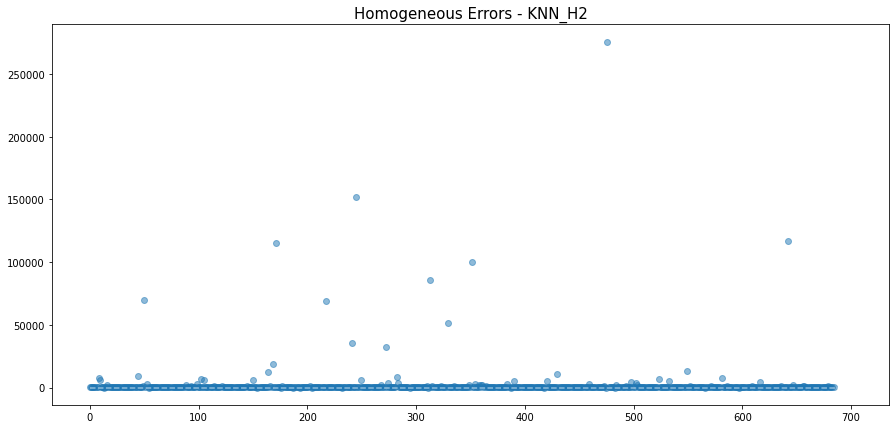

In [70]:
plt.figure(figsize=(15,7))
# Errores
ax_x_H2= performance_H2['True Value']
ax_y_H2= performance_H2['Prediction']
yerr_H2= performance_H2['Error']

plt.scatter(range(len(yerr_H2)), yerr_H2, alpha=.5)
plt.title('Homogeneous Errors - KNN_H2', size=15);
plt.hlines(y=0, xmin=0, xmax=700, linestyle='--', color='white', alpha=.5);

In [71]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance_H2["acceptance_criteria"] = 0
performance_H2.loc[performance_H2.query('Error<=15').index ,"acceptance_criteria"]=1
display(performance_H2)

,True Value,Prediction,Error,acceptance_criteria
0,10904.28,30383.030,178.633986,0
1,69652.94,21267.238,69.466848,0
2,8577.44,25843.190,201.292577,0
3,12667.01,27129.132,114.171553,0
4,30986.69,24040.372,22.417102,0
...,...,...,...,...
680,25906.62,7028.008,72.871768,0
681,36763.11,42966.556,16.874106,0
682,68593.11,35204.800,48.675895,0
683,120037.40,51337.446,57.232124,0


In [72]:
len(performance_H2.query('Error<=30').index)

173

In [73]:
(len(performance_H2.index))

685

In [74]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance_H2.query('Error<=30').index)/(len(performance_H2.index))

0.25255474452554744

Nuevamente el valor obtenido no es cercano al obtenido por la función .score

1.   **Score**: 0.1455394750654706
2.   **Precisión manual**: 0.20947252140292738

## Tercer set

Para el tercer set se promediarán los datos de rebajas de Markdowns, disminuyendo la carga computacional para el modelo.

### Datos no festivos:

In [75]:
Features_data_set['MarkDowns'] = Features_data_set[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']].mean(axis=1)
Features_data_set

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MarkDowns
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,NaN
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,NaN
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,NaN
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,NaN
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,2287.996
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,3850.840
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,1719.634
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,1127.042


In [76]:
Features_data_set3 = Features_data_set.drop(columns = ['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [77]:
join_data_set3 = pd.merge(Features_data_set3, sales_data_set, on = ['Store', 'Date'])
join_data_set3

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,MarkDowns,Dept,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,1,24924.50,False
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,2,50605.27,False
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,3,13740.12,False
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,4,39954.04,False
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,NaN,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,97,6817.48,False


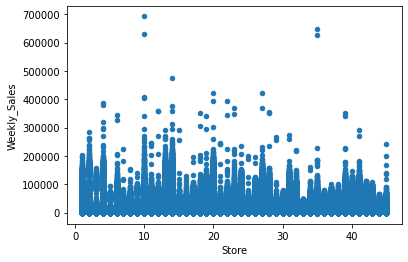

In [78]:
join_data_set3.plot(kind = 'scatter', x = 'Store', y =  'Weekly_Sales')
plt.show()

In [79]:
#Se eliminan aquellas filas con datos nulos
join_data_set3.dropna(inplace=True)
join_data_set3

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,MarkDowns,Dept,Weekly_Sales,IsHoliday_y
6587,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,1,18689.54,False
6588,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,2,44936.47,False
6589,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,3,9959.64,False
6590,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,4,36826.52,False
6591,1,11/11/2011,59.11,3.297,217.998085,7.866,False,5134.336,5,31002.65,False
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,192.308899,8.667,False,1049.452,97,6817.48,False


In [80]:
#a continuación se separan los datos de los días festivos para analizarlos por separado.
join_data_Holiday_set3 = join_data_set3.query('IsHoliday_x == True')
join_data_no_Holiday_set3 = join_data_set3.query('IsHoliday_x == False')

In [81]:
join_data_no_Holiday_set3.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday_x', 'MarkDowns', 'Dept', 'Weekly_Sales', 'IsHoliday_y'],
      dtype='object')

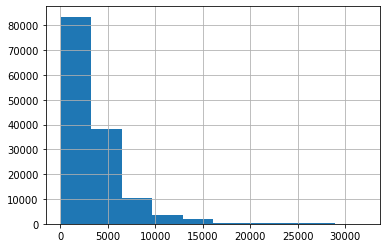

In [82]:
join_data_no_Holiday_set3['MarkDowns'].hist()

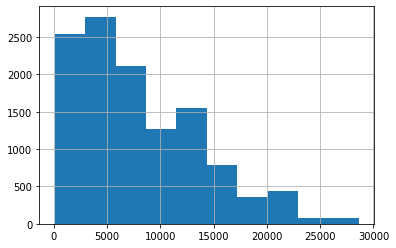

In [83]:
join_data_Holiday_set3['MarkDowns'].hist()

En los gráficos anteriores, se observa que al unir las columas de datos Markdown's en una sola y calcularle la media, los datos de esta última se encuentran con un mejor balance que al estar todas por separado.

In [84]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y3 = join_data_no_Holiday_set3["Weekly_Sales"].values
X3 = join_data_no_Holiday_set3[["Dept","Fuel_Price", "CPI", "Unemployment", "MarkDowns"]].values

In [85]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size= 0.2)

#crea un modelo KNN con 5 "vecinos"
knn3 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn3.fit(X_train3, y_train3)


KNeighborsRegressor()

In [86]:
#realiza una predicción en base a los datos de testeo
y_pred3 = knn3.predict(X_test3)
#se imprime las predicciones realizadas
print("Predicciones set 3: {}".format(y_pred3))

Predicciones set 3: [ 8342.972  5378.826 20412.058 ...  6586.38  19217.974 34426.546]


In [87]:
#se verifica la precisión con los datos de testeo
score_knn3 = knn3.score(X_test3, y_test3)
score_knn3

0.2915838644821156

In [88]:
#a continuación se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds3 = knn3.predict(X_test3)

performance3 = pd.DataFrame({ 'True Value': y_test3,
                            'Prediction': preds3,
                            'Error': (abs(preds3 - y_test3)*100)/y_test3})

performance3

<ipython-input-88-4d23f6cf3785>:6: RuntimeWarning: divide by zero encountered in true_divide
  'Error': (abs(preds3 - y_test3)*100)/y_test3})


,True Value,Prediction,Error
0,4305.08,8342.972,93.793658
1,10571.46,5378.826,49.119365
2,22401.75,20412.058,8.881860
3,1970.00,1710.948,13.149848
4,5897.86,6205.980,5.224268
...,...,...,...
27884,22135.80,26718.434,20.702364
27885,2426.66,4809.058,98.176011
27886,8358.84,6586.380,21.204617
27887,7866.60,19217.974,144.298350


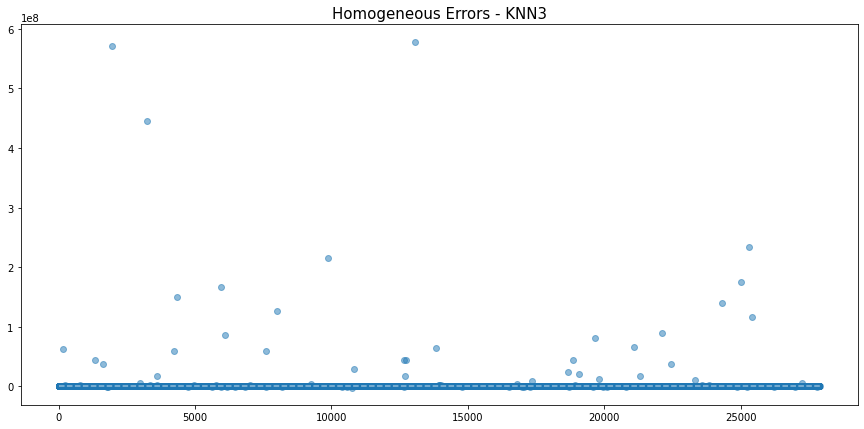

In [89]:
plt.figure(figsize=(15,7))
# Errores
ax_x3= performance3['True Value']
ax_y3= performance3['Prediction']
yerr3= performance3['Error']

plt.scatter(range(len(yerr3)), yerr3, alpha=.5)
plt.title('Homogeneous Errors - KNN3', size=15);
plt.hlines(y=0, xmin=0, xmax=27889 , linestyle='--', color='white', alpha=.5);

In [90]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance3["acceptance_criteria"] = 0
performance3.loc[performance3.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance3)

,True Value,Prediction,Error,acceptance_criteria
0,4305.08,8342.972,93.793658,0
1,10571.46,5378.826,49.119365,0
2,22401.75,20412.058,8.881860,1
3,1970.00,1710.948,13.149848,1
4,5897.86,6205.980,5.224268,1
...,...,...,...,...
27884,22135.80,26718.434,20.702364,1
27885,2426.66,4809.058,98.176011,0
27886,8358.84,6586.380,21.204617,1
27887,7866.60,19217.974,144.298350,0


In [91]:
len(performance3.query('Error<=30').index)

6152

In [92]:
(len(performance3.index))

27889

In [93]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance3.query('Error<=30').index)/(len(performance3.index))

0.22058876259457133

El actual valor obtenido sigue sin ser similar al obtenido por la función .score, pero a mejorado bastante, es por ello, que este ha sido el mejor modelo obtenido para KNN.

1.   **Score**: 0.2891043446645618
2.   **Precisión manual**: 0.21746925311054538

### Datos festivos:

In [94]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_H3 = join_data_Holiday_set3["Weekly_Sales"].values
X_H3 = join_data_Holiday_set3[["Dept","Fuel_Price", "CPI", "Unemployment", "MarkDowns"]].values

In [95]:
#se asignan de manera pseudo aleatoria los datos para llevar a cabo el entrenamiento y posterior testeo.
X_train_H3, X_test_H3, y_train_H3, y_test_H3 = train_test_split(X_H3, y_H3, test_size= 0.2)

#crea un modelo KNN con 5 "vecinos"
knn_H3 = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p = 2)
#entrenamos el regresor
knn_H3.fit(X_train_H3, y_train_H3)


KNeighborsRegressor()

In [96]:
#realiza una predicción en base a los datos de testeo
y_pred_H3 = knn_H3.predict(X_test_H3)
#se imprime las predicciones realizadas
print("Predicciones festivas del set 3: {}".format(y_pred_H3))

Predicciones festivas del set 3: [33960.372 11965.958 15468.006 ... 15177.15  54611.652 32458.216]


In [97]:
#se verifica la precisión con los datos de testeo
score_knn_H3 = knn_H3.score(X_test_H3, y_test_H3)
score_knn_H3

0.10118204842626966

In [98]:
#a continuación se genera una tabla comparativa entre los datos reales y los predichos, además de su % de error.
preds_H3 = knn_H3.predict(X_test_H3)

performance_H3 = pd.DataFrame({ 'True Value': y_test_H3,
                            'Prediction': preds_H3,
                            'Error': (abs(preds_H3 - y_test_H3)*100)/y_test_H3})

performance_H3

,True Value,Prediction,Error
0,25410.20,33960.372,33.648582
1,72.96,11965.958,16300.709978
2,20538.32,15468.006,24.687092
3,6456.40,3335.556,48.337216
4,19112.59,37753.720,97.533249
...,...,...,...
2394,2229.19,1959.980,12.076584
2395,2117.38,15937.066,652.678593
2396,5136.66,15177.150,195.467288
2397,12774.42,54611.652,327.507879


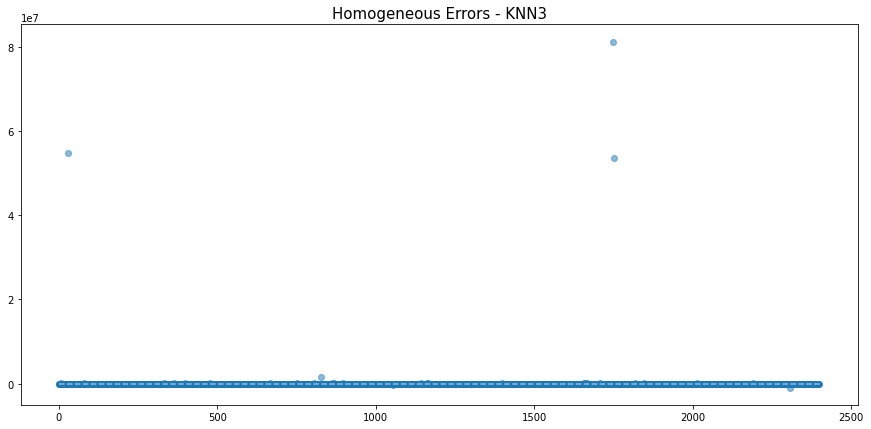

In [99]:
plt.figure(figsize=(15,7))
# Errores
ax_x_H3= performance_H3['True Value']
ax_y_H3= performance_H3['Prediction']
yerr_H3= performance_H3['Error']

plt.scatter(range(len(yerr_H3)), yerr_H3, alpha=.5)
plt.title('Homogeneous Errors - KNN3', size=15);
plt.hlines(y=0, xmin=0, xmax=2400 , linestyle='--', color='white', alpha=.5);

In [100]:
#a continuación se verifica la precisión en base a un treshold menor al 30% de error
performance_H3["acceptance_criteria"] = 0
performance_H3.loc[performance_H3.query('Error<=30').index ,"acceptance_criteria"]=1
display(performance_H3)

,True Value,Prediction,Error,acceptance_criteria
0,25410.20,33960.372,33.648582,0
1,72.96,11965.958,16300.709978,0
2,20538.32,15468.006,24.687092,1
3,6456.40,3335.556,48.337216,0
4,19112.59,37753.720,97.533249,0
...,...,...,...,...
2394,2229.19,1959.980,12.076584,1
2395,2117.38,15937.066,652.678593,0
2396,5136.66,15177.150,195.467288,0
2397,12774.42,54611.652,327.507879,0


In [101]:
len(performance_H3.query('Error<=30').index)

447

In [102]:
(len(performance_H3.index))

2399

In [103]:
#precisión calculada a través de la fórmula perteneciente a las partes de una matriz de confusión: prefición = #TruePositive / #(TruePositive + FalsePositive)
len(performance_H3.query('Error<=30').index)/(len(performance_H3.index))

0.18632763651521467

El valor obtenido sigue sin ser similar al obtenido por la función .score, pero este a mejorado bastante, es por ello, que este ha sido el mejor modelo obtenido para KNN con los siguientes datos.

1.   **Score**: 0.15406018673024635
2.   **Precisión manual**: 0.2113380575239683

Finalmente se decide hacer uso del set 3 de KNN para llevar a cabo la predicción con los datos de la Tabla1, dado a que el set 3 posee (a pesar de ser baja) una mayor presición que el resto de set's creados.

## Tabla1

### Procesamiento de datos

Primero se procesarán los datos de la tabla 1 para que queden acorde al funcionamiento del modelo KNN del set 3.

In [104]:
Tabla_1['MarkDowns'] = Tabla_1[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']].mean(axis=1)
Tabla_1

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,MarkDowns
0,0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,9691.276227,464.157260,21484.678945,15838.706634,10074.683942,216.603308,6.529,False,11510.700602
1,1,21,52,24/06/2011,169199.146654,False,59.608361,3.594,35052.144316,33433.615110,23406.818748,10586.568174,18348.012177,214.744111,7.931,False,24165.431705
2,2,9,24,27/01/2012,76445.807545,False,16.623822,3.290,13763.521756,33784.341040,26138.012756,21585.291347,1582.360568,223.806053,5.667,False,19370.705493
3,3,6,60,05/08/2011,529384.632399,False,36.466380,3.684,7446.306499,2438.613334,5175.440486,10227.979090,8692.253401,217.083989,6.925,False,6796.118562
4,4,17,42,23/12/2011,590421.125970,False,92.396503,3.186,2679.329519,9565.582845,23651.312194,12981.884477,10443.878610,129.984548,6.617,False,11864.397529
5,5,31,87,24/08/2012,556894.615504,False,43.412585,3.620,74319.059467,37408.818862,18482.402292,20620.695196,3846.379089,221.808352,6.565,False,30935.470981
6,6,21,83,19/03/2010,682722.852234,False,52.963927,2.720,78985.685314,31341.343607,12708.044607,5875.072096,688.137256,210.873332,8.324,False,25919.656576
7,7,4,29,30/09/2011,70387.018913,False,74.145519,3.371,9436.763466,41393.898678,29216.144403,15784.237223,7165.225061,129.606067,5.644,False,20599.253766
8,8,20,16,24/12/2010,326232.854841,False,26.041172,3.141,3564.696521,5771.074248,18289.236301,4481.732712,405.051798,204.637673,7.484,False,6502.358316
9,9,22,46,27/05/2011,436981.323825,False,28.162576,4.034,85035.636423,4078.768416,20681.908333,3242.237108,12731.765498,138.678283,8.252,False,25154.063156


In [105]:
Tabla_1_processed = Tabla_1.drop(columns = ['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

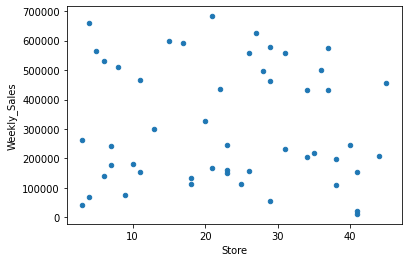

In [106]:
Tabla_1_processed.plot(kind = 'scatter', x = 'Store', y =  'Weekly_Sales')
plt.show()

In [107]:
#a continuación se separan los datos de los días festivos para analizarlos por separado.
Tabla_1_processed_Holiday = Tabla_1_processed.query('IsHoliday_x == True')
Tabla_1_processed_No_Holiday = Tabla_1_processed.query('IsHoliday_x == False')

In [108]:
Tabla_1_processed_Holiday

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,MarkDowns
21,21,27,50,10/02/2012,625880.623167,True,99.921138,3.826,141.119983,8.009,True,22938.224516


In [109]:
Tabla_1_processed_No_Holiday

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,MarkDowns
0,0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,216.603308,6.529,False,11510.700602
1,1,21,52,24/06/2011,169199.146654,False,59.608361,3.594,214.744111,7.931,False,24165.431705
2,2,9,24,27/01/2012,76445.807545,False,16.623822,3.290,223.806053,5.667,False,19370.705493
3,3,6,60,05/08/2011,529384.632399,False,36.466380,3.684,217.083989,6.925,False,6796.118562
4,4,17,42,23/12/2011,590421.125970,False,92.396503,3.186,129.984548,6.617,False,11864.397529
5,5,31,87,24/08/2012,556894.615504,False,43.412585,3.620,221.808352,6.565,False,30935.470981
6,6,21,83,19/03/2010,682722.852234,False,52.963927,2.720,210.873332,8.324,False,25919.656576
7,7,4,29,30/09/2011,70387.018913,False,74.145519,3.371,129.606067,5.644,False,20599.253766
8,8,20,16,24/12/2010,326232.854841,False,26.041172,3.141,204.637673,7.484,False,6502.358316
9,9,22,46,27/05/2011,436981.323825,False,28.162576,4.034,138.678283,8.252,False,25154.063156


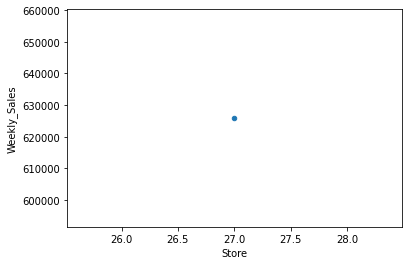

In [110]:
Tabla_1_processed_Holiday.plot(kind = 'scatter', x = 'Store', y =  'Weekly_Sales')
plt.show()

Al observar que entre los datos de Tabla_1 solo se puede encontrar un día festivo, los datos no serán separados y se analizarán todos juntos.

In [111]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_Tabla_1 = Tabla_1_processed["Weekly_Sales"].values
X_Tabla_1 = Tabla_1_processed[["Dept","Fuel_Price", "CPI", "Unemployment", "MarkDowns"]].values

In [112]:
#realiza una predicción en base a los datos de testeo
y_pred_Tabla_1 = knn3.predict(X_Tabla_1)
#se imprime las predicciones realizadas
print("Predicciones en base a los datos de Tabla_1 en los dias no festivos:\n{}".format(y_pred_Tabla_1))

Predicciones en base a los datos de Tabla_1 en los dias no festivos:
[ 17004.628   2830.918  14663.636   2631.344  31253.568  15554.6
  22580.674   3965.104  19654.926  11664.368  16353.188   5539.076
   5645.102  25450.558  18102.944   6266.674   1997.132   8532.994
  10432.938   8213.246 107520.406   2925.86   12410.71   30695.56
  15779.352 105790.432  15896.146  27298.894  15528.074   5460.754
  36517.084  15779.352   7873.18    2121.446  18108.77    6609.732
   2121.446   5122.122   7145.898  56274.806   1452.306   8134.244
  24613.502  49663.074   3200.448   5214.48    4817.994   9279.87
   3951.378  21804.656]


In [178]:
error_porcentual_KNN= (abs(y_pred_Tabla_1 - y_Tabla_1)*100)/y_Tabla_1
print(error_porcentual_KNN)

[ 96.98666591  98.32687218  80.81826006  99.50294288  94.7065634
  97.20690422  96.69255629  94.36671128  93.97518499  97.33069416
  93.75856355  97.73809379  99.05511734  16.94490536  92.57886832
  97.14651784  99.53753747  94.48801488  97.59522318  94.8674135
  48.63041893  99.53252108  97.83692283  80.50926143  85.85905519
  81.75758688  70.89685307  88.22538272  89.97497662  96.97543758
 207.4432741   96.82043174  93.15945602  99.13398072  88.06577059
  98.58322265  99.62014652  97.50638797  94.85509482  38.80558755
  99.6867164   95.86781873  78.15440246  83.36329246  97.59470506
  98.96070419  99.05777888  98.59109427  97.77057657  95.23511183]


Tras analizar los datos obtenidos se observa que KNN no da una estimación certera de los datos, dado a que el set que mejor predicciones puede entregar posee una accuracy cercana al 28,9% es por ello que la predicción obtenida no es confiable y se recomienda buscar otra metodología más adecuada a el conjunto de datos con el cual se debe llevar a cabo el entrenamiento para la predicción necesaria.

# RF

Dado a que el comportamiento entre RF y KNN difiere, se usarán las mismas variantes en sus respectivos sets para comparar los resultados.

## Primer set
Haciendo uso de los datos disponibilisados se trabajará analizando por separado los dias festivos y no festivos.

### Datos no festivos:

In [131]:
#crea un modelo de random forest con los valores predeterminados.
rf = RandomForestRegressor()
#entrenamos el regresor
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
#se verifica el accuracy promedio con los datos de testeo a través de la función .score
score_rf = rf.score(X_test, y_test)
score_rf

0.8212497016695871

### Datos festivos:

In [132]:
#crea un modelo de random forest con los valores predeterminados.
rf_H = RandomForestRegressor()
#entrenamos el regresor
rf_H.fit(X_train_H, y_train_H)


RandomForestRegressor()

In [133]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf_H = rf.score(X_test_H, y_test_H)
score_rf_H

-0.32081638389821254

## Segundo set
Donde se realiza un balanceo de datos para la columna "Weekly_Sales"

### Datos no festivos:

In [134]:
#crea un modelo de random forest con los valores predeterminados.
rf2 = RandomForestRegressor()
#entrenamos el regresor
rf2.fit(X_train2, y_train2)


RandomForestRegressor()

In [135]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf2 = rf2.score(X_test2, y_test2)
score_rf2

0.8351715204099831

### Datos festivos:

In [136]:
#crea un modelo de random forest con los valores predeterminados.
rf_H2 = RandomForestRegressor()
#entrenamos el regresor
rf_H2.fit(X_train_H2, y_train_H2)


RandomForestRegressor()

In [137]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf_H2 = rf_H2.score(X_test_H2, y_test_H2)
score_rf_H2

0.8189156034261712

## Tercer set
Para el tercer set se promediarán los datos de rebajas de Markdowns, disminuyendo la carga computacional para el modelo.

### Datos no festivos:

In [138]:
#crea un modelo de random forest con los valores predeterminados.
rf3 = RandomForestRegressor()
#entrenamos el regresor
rf3.fit(X_train3, y_train3)


RandomForestRegressor()

In [139]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf3 = rf3.score(X_test3, y_test3)
score_rf3

0.7992999621410805

### Datos festivos:

In [140]:
#crea un modelo de random forest con los valores predeterminados.
rf_H3 = RandomForestRegressor()
#entrenamos el regresor
rf_H3.fit(X_train_H3, y_train_H3)


RandomForestRegressor()

In [141]:
#se verifica la precisión con los datos de testeo a través de la función .score que calcula el coeficiente de determinación de la predicción.
score_rf_H3 = rf_H3.score(X_test_H3, y_test_H3)
score_rf_H3

0.7076476284812856

En base a las accuracy obtenidas en los 3 set de datos, el mejor RF obtenido es el del set 2, es por ello que se elige este para el analisis de los datos de Tabla_1

## Tabla1

### Procesamiento de datos

In [149]:
Tabla_1 = pd.read_csv('Tabla_1.csv', header = 0)

In [152]:
Tabla_1.columns

Index(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [151]:
#se crean arrays para las características y la variable de destino en el caso de dias no festivos.
y_Tabla_1_RF = Tabla_1["Weekly_Sales"].values
X_Tabla_1_RF = Tabla_1[["Dept","Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]].values

In [167]:
#realiza una predicción en base a los datos de testeo
y_pred_Tabla_1_RF = rf2.predict(X_Tabla_1_RF)
#se imprime las predicciones realizadas
print("Predicciones en base a los datos de Tabla_1 con Random Forest:\n{}".format(y_pred_Tabla_1_RF))

Predicciones en base a los datos de Tabla_1 con Random Forest:
[15786.1242  4087.9179 14337.6063  1585.5503  6792.0029 35920.7513
  7314.754  13933.3493 12425.8056 37502.1383 32909.794   3575.08
 11700.4945 31219.6192 27323.3834  9528.5142  1551.9442 28118.2243
  4360.5992 78820.3816 71719.147   2906.6217  8098.4187 42861.9932
 35183.4998 31866.5707 19072.4387 11540.1005 12205.152   5412.9997
 32606.2372 60145.9253  7877.1999  4604.7447 26923.9067 10461.0914
 59882.3046 17087.9586  4085.2703 24117.4255  7983.0973 11505.5919
 73620.7801  7374.1532 16153.1612  8870.5167  4677.3    26352.0896
  3692.2046 16317.2937]


In [177]:
error_porcentual_rf= (abs(y_pred_Tabla_1_RF - y_Tabla_1_RF)*100)/y_Tabla_1_RF
print(error_porcentual_rf)

[ 97.20259295  97.58396069  81.24474479  99.70049182  98.84963417
  93.54981171  98.92859101  80.20466058  96.19112379  91.41790821
  87.43948961  98.54010025  98.04155986  43.45364894  88.79903588
  95.66126381  99.64062664  81.83671126  98.99488832  50.74390487
  65.73503883  99.53559487  98.58851713  72.78394972  68.46968564
  94.50495535  65.08159992  95.0224992   92.1202762   97.00188738
 174.51721832  87.88048616  93.15596337  98.12024549  82.25632778
  97.75769466  89.27783136  91.68103784  97.05868621  40.51275065
  98.27792941  94.15518008  34.65822407  97.52972138  87.86010057
  98.23202106  99.08529341  95.99912391  97.91680587  96.43424415]


Tras analizar los datos obtenidos se observa que RF tampoco da una buena estimación de los datos a pesar de poseer una accuracy cercana al 83,5% da lo cual no se puede confiar, ya que existe la posibilidad de que se haya sufrido de un sobre entrenamiento del modelo.

In [181]:
print("diferencial entre KNN y RF_", y_pred_Tabla_1 - y_pred_Tabla_1_RF)

diferencial entre KNN y RF_ [ 1.21850380e+03 -1.25699990e+03  3.26029700e+02  1.04579370e+03
  2.44615651e+04 -2.03661513e+04  1.52659200e+04 -9.96824530e+03
  7.22912040e+03 -2.58377703e+04 -1.65566060e+04  1.96399600e+03
 -6.05539250e+03 -5.76906120e+03 -9.22043940e+03 -3.26184020e+03
  4.45187800e+02 -1.95852303e+04  6.07233880e+03 -7.06071356e+04
  3.58012590e+04  1.92383000e+01  4.31229130e+03 -1.21664332e+04
 -1.94041478e+04  7.39238613e+04 -3.17629270e+03  1.57587935e+04
  3.32292200e+03  4.77543000e+01  3.91084680e+03 -4.43665733e+04
 -4.01990000e+00 -2.48329870e+03 -8.81513670e+03 -3.85135940e+03
 -5.77608586e+04 -1.19658366e+04  3.06062770e+03  3.21573805e+04
 -6.53079130e+03 -3.37134790e+03 -4.90072781e+04  4.22889208e+04
 -1.29527132e+04 -3.65603670e+03  1.40694000e+02 -1.70722196e+04
  2.59173400e+02  5.48736230e+03]


A pesar de que ambos algoritmos analizaron los datos de Tabla_1 son set de entrenamiento diferentes, ambos obtuvieron resultados lejos de ser aceptables. Como se menciona anteriormente, a pesar de que RF posee una acuraccy mejor, es probable a que este sufriera de sobreentrenamiento. Por otro lado,  KNN desde un inicio mostraba poca confiabilidad en sus cálculos.